
IRIS DATASET CLASSIFICATION
First few rows of Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Encoded target values: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


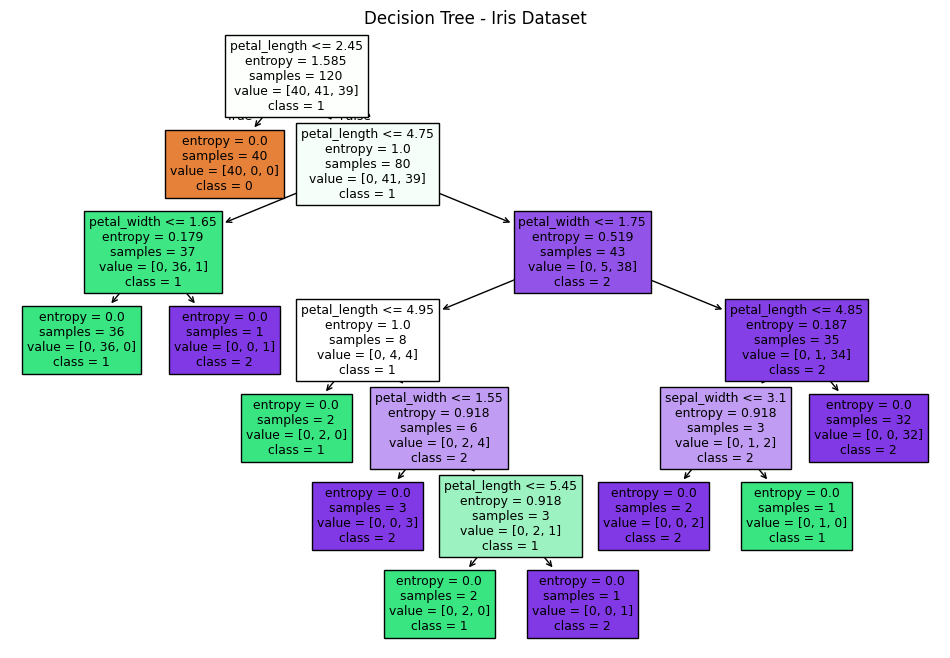

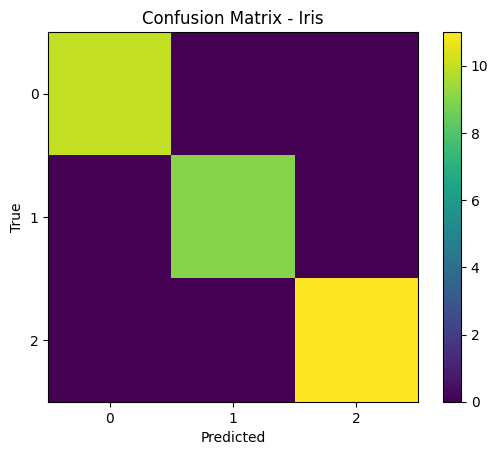


DRUG DATASET CLASSIFICATION
First few rows of Drug dataset:
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Accuracy: 1.00
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


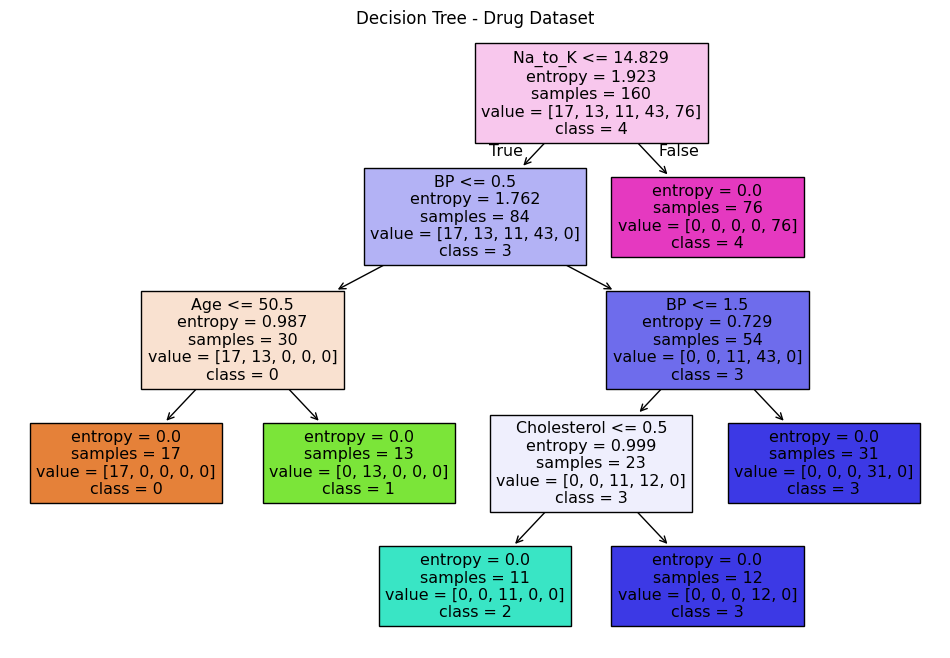

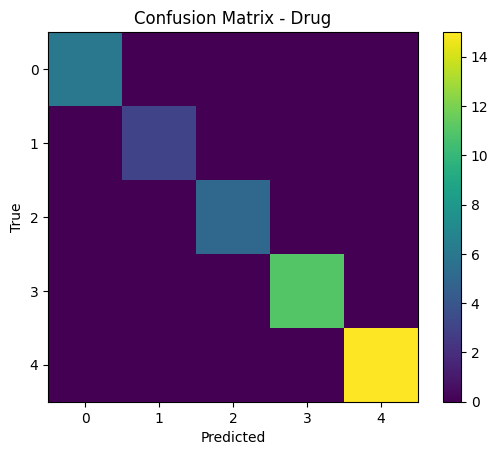


PETROL CONSUMPTION REGRESSION TREE
First few rows of Petrol Consumption dataset:
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  

Mean Absolute Error (MAE): 94.30
Mean Squared Error (MSE): 17347.70
Root Mean Squared Error (RMSE): 131.71


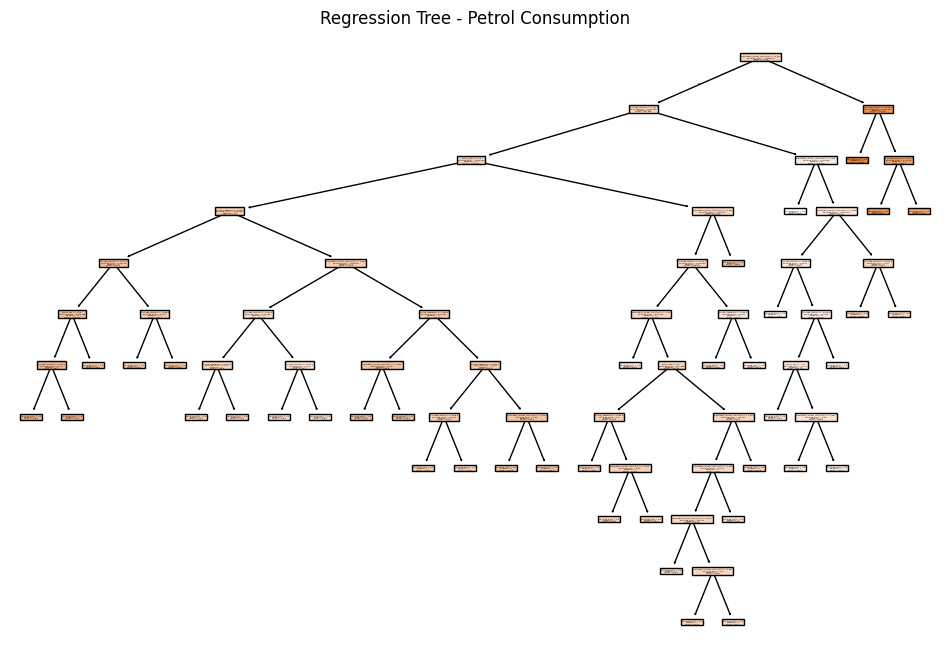

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error

print("\nIRIS DATASET CLASSIFICATION")
iris = pd.read_csv("iris.csv")
print("First few rows of Iris dataset:")
print(iris.head())
target_col_iris = "species"
if target_col_iris not in iris.columns:
    target_col_iris = iris.columns[-1]
if iris[target_col_iris].dtype == 'object':
    le_iris = LabelEncoder()
    iris[target_col_iris] = le_iris.fit_transform(iris[target_col_iris])
    print("Encoded target values:", le_iris.classes_)
X_iris = iris.drop(target_col_iris, axis=1)
y_iris = iris[target_col_iris]
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
clf_iris = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = clf_iris.predict(X_test_iris)
acc_iris = accuracy_score(y_test_iris, y_pred_iris)
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
print(f"\nAccuracy: {acc_iris:.2f}")
print("Confusion Matrix:")
print(cm_iris)
plt.figure(figsize=(12, 8))
plot_tree(clf_iris, filled=True, feature_names=X_iris.columns,
          class_names=[str(cls) for cls in sorted(iris[target_col_iris].unique())])
plt.title("Decision Tree - Iris Dataset")
plt.show()
plt.figure()
plt.imshow(cm_iris, interpolation='nearest')
plt.title("Confusion Matrix - Iris")
plt.colorbar()
ticks = sorted(iris[target_col_iris].unique())
plt.xticks(range(len(ticks)), ticks)
plt.yticks(range(len(ticks)), ticks)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nDRUG DATASET CLASSIFICATION")
drug = pd.read_csv("drug.csv")
print("First few rows of Drug dataset:")
print(drug.head())
target_col_drug = "Drug"
if target_col_drug not in drug.columns:
    target_col_drug = drug.columns[-1]
le_drug = {}
for col in drug.columns:
    if drug[col].dtype == 'object':
        le = LabelEncoder()
        drug[col] = le.fit_transform(drug[col])
        le_drug[col] = le
X_drug = drug.drop(target_col_drug, axis=1)
y_drug = drug[target_col_drug]
X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)
clf_drug = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_drug.fit(X_train_drug, y_train_drug)
y_pred_drug = clf_drug.predict(X_test_drug)
acc_drug = accuracy_score(y_test_drug, y_pred_drug)
cm_drug = confusion_matrix(y_test_drug, y_pred_drug)
print(f"\nAccuracy: {acc_drug:.2f}")
print("Confusion Matrix:")
print(cm_drug)
plt.figure(figsize=(12, 8))
plot_tree(clf_drug, filled=True, feature_names=X_drug.columns,
          class_names=[str(cls) for cls in sorted(drug[target_col_drug].unique())])
plt.title("Decision Tree - Drug Dataset")
plt.show()
plt.figure()
plt.imshow(cm_drug, interpolation='nearest')
plt.title("Confusion Matrix - Drug")
plt.colorbar()
ticks = sorted(drug[target_col_drug].unique())
plt.xticks(range(len(ticks)), ticks)
plt.yticks(range(len(ticks)), ticks)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nPETROL CONSUMPTION REGRESSION TREE")
petrol = pd.read_csv("petrol_consumption.csv")
print("First few rows of Petrol Consumption dataset:")
print(petrol.head())
target_col_petrol = "Petrol_Consumption"
if target_col_petrol not in petrol.columns:
    target_col_petrol = petrol.columns[-1]
X_petrol = petrol.drop(target_col_petrol, axis=1)
y_petrol = petrol[target_col_petrol]
for col in X_petrol.columns:
    if X_petrol[col].dtype == 'object':
        le = LabelEncoder()
        X_petrol[col] = le.fit_transform(X_petrol[col])
X_train_petrol, X_test_petrol, y_train_petrol, y_test_petrol = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)
reg_tree = DecisionTreeRegressor(random_state=42)
reg_tree.fit(X_train_petrol, y_train_petrol)
y_pred_petrol = reg_tree.predict(X_test_petrol)
mae = mean_absolute_error(y_test_petrol, y_pred_petrol)
mse = mean_squared_error(y_test_petrol, y_pred_petrol)
rmse = mse**0.5
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
plt.figure(figsize=(12, 8))
plot_tree(reg_tree, filled=True, feature_names=X_petrol.columns)
plt.title("Regression Tree - Petrol Consumption")
plt.show()
